## Comparing Across the three datasets:

### Estimating a Non-spatial Regression Model

We now have looked at Pune city individually and by comparing two datasets with each other.
1.  **Socio-Economic Factors:** We understand how Pune's society looks, and understood where there is a dominant population of majorities and minorities in the city. We also saw how economic activity is spread across the two social groups by comparing marginal low-output activities.

1. **Municipal Investment** We understood how the street network changes and is laid out in each census ward. We also checked how the density of population and streets compares against each other. What areas have the expected density, and which do not (higher or lower)

1. **Transit Infrastructure** We see how the PMPML is spread across the city, and which areas seem over, or underserved depending on the population, and population density.

After seeing all these insights, we can further check whether there is any observable correlation across these three datasets. As explained in the introduction, the groups classified as SC (Scheduled Caste) and ST (Scheduled Tribes) are among the most socially and economically disadvantaged in India. After looking through the data, and the study we conducted, the following indicators felt interesting to look at as predictors of a ward's SC and ST proportion.

1. **Number of Bus Stops** A larger number of bus stops in an area gives a larger spread of areas a user/commuter can travel without needing to change lines/vehicles. This gives better access to larger parts of the city.

1. **Population Density** Ideally a denser area of the city would see a larger concentration of services as well. How this compares to other factors will be interesting to see.

1. **Kilometers of Street Length per Resident** Informal settlements, also called slums, tend to have fewer 'legitimate'roads, leading to poor quality access paths without sufficient asphalting, footpaths, or other street infrastructure. As we have established, a disproportionately large number of SC/ST citizens form the poorest sections of society, and have a higher likelihood of residing in these settlements. As a result, this would be an interesting variable to consider.

1. **Proportion of Literate Residents** This is an important factor to consider. An illiterate person has fewer economic opportuties, and consequently also a lower spending power. In a city like Pune, where only 18.8% of the population uses public transport, bus nearly 33% walk, we can guess that the cost of a bus ticket or pass may be prohibitively expensive for at least some of those who are exclusively pedestrian.

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import folium
import pandas as pd
import pysal as ps
import seaborn as sns
import statsmodels.api as sm
from cartopy import crs as ccrs
from geopy.distance import great_circle
from shapely.geometry import Point
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

np.random.seed(0)
%matplotlib inline

/opt/conda/lib/python3.7/site-packages/pysal/model/spvcm/abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


In [2]:
pnq_census = gpd.read_file("data/PCA_complete/PCA_complete.shp")
pnq_census = gpd.GeoDataFrame(pnq_census)

In [3]:
list(pnq_census)

['Ward',
 'No_HH',
 'TOT_P',
 'TOT_M',
 'TOT_F',
 'P_06',
 'M_06',
 'F_06',
 'P_SC',
 'M_SC',
 'F_SC',
 'P_ST',
 'M_ST',
 'F_ST',
 'P_LIT',
 'M_LIT',
 'F_LIT',
 'P_ILL',
 'M_ILL',
 'F_ILL',
 'TOT_WORK_P',
 'TOT_WORK_M',
 'TOT_WORK_F',
 'MAINWORK_P',
 'MAINWORK_M',
 'MAINWORK_F',
 'MAIN_CL_P',
 'MAIN_CL_M',
 'MAIN_CL_F',
 'MAIN_AL_P',
 'MAIN_AL_M',
 'MAIN_AL_F',
 'MAIN_HH_P',
 'MAIN_HH_M',
 'MAIN_HH_F',
 'MAIN_OT_P',
 'MAIN_OT_M',
 'MAIN_OT_F',
 'MARGWORK_P',
 'MARGWORK_M',
 'MARGWORK_F',
 'MARG_CL_P',
 'MARG_CL_M',
 'MARG_CL_F',
 'MARG_AL_P',
 'MARG_AL_M',
 'MARG_AL_F',
 'MARG_HH_P',
 'MARG_HH_M',
 'MARG_HH_F',
 'MARG_OT_P',
 'MARG_OT_M',
 'MARG_OT_F',
 'MARGWORK_3',
 'MARGWORK_1',
 'MARGWORK_2',
 'MARG_CL_3_',
 'MARG_CL__1',
 'MARG_CL__2',
 'MARG_AL_3_',
 'MARG_AL__1',
 'MARG_AL__2',
 'MARG_HH_3_',
 'MARG_HH__1',
 'MARG_HH__2',
 'MARG_OT_3_',
 'MARG_OT__1',
 'MARG_OT__2',
 'MARGWORK_0',
 'MARGWORK_4',
 'MARGWORK_5',
 'MARG_CL_0_',
 'MARG_CL__3',
 'MARG_CL__4',
 'MARG_AL_0_',
 'MARG_AL

In [4]:
response = 'pct_scst'
pnq_census = pnq_census.dropna(subset=[response])

In [5]:
predictors = ['stop_count', 'pct_lit', 'str_per_P', 'pop_dens']
X = pnq_census[predictors].dropna()
y = pnq_census.loc[X.index][response]

In [6]:
Xc = add_constant(X)
model = sm.OLS(y, Xc)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               pct_scst   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     27.44
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           1.40e-16
Time:                        02:41:31   Log-Likelihood:                -469.92
No. Observations:                 137   AIC:                             949.8
Df Residuals:                     132   BIC:                             964.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        120.8627     10.335     11.694      0.0

/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [7]:
correlations = pnq_census[[response] + sorted(predictors)].corr()
correlations.round(2)

,pct_scst,pct_lit,pop_dens,stop_count,str_per_P
pct_scst,1.00,-0.63,-0.04,-0.01,0.06
pct_lit,-0.63,1.00,-0.07,-0.12,0.04
pop_dens,-0.04,-0.07,1.00,-0.45,-0.51
stop_count,-0.01,-0.12,-0.45,1.00,0.70
str_per_P,0.06,0.04,-0.51,0.70,1.00


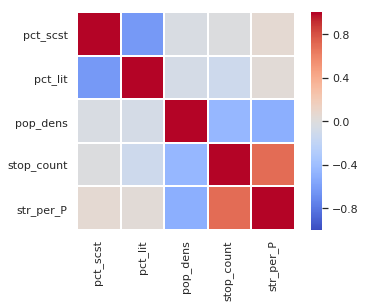

In [8]:
sns.set(style='white')
ax = sns.heatmap(correlations, vmin=-1, vmax=1, center=0,
                 cmap=plt.cm.coolwarm, square=True, linewidths=1)

Here we see some interesting correlations.